# Projeto de IA

Leia o artigo [A New Distance-weighted k -nearest Neighbor Classifier](https://www.researchgate.net/profile/Jianping-Gou/publication/266872328_A_New_Distance-weighted_k_-nearest_Neighbor_Classifier/links/5451acdf0cf2bf864cba99fc/A-New-Distance-weighted-k-nearest-Neighbor-Classifier.pdf) e compreenda a implementação do Weighted KNN (WKNN) e do Distance-Weighted KNN (DWKNN).`

In [ ]:
# importação base de dados
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

## 1. Implementação

Utilizando a implementação do KNN (que realizamos em sala) como modelo, Implemente as classes WKNN e DWKNN, ambas com os métodos `fit()` e `predict()

### 1.1. K Nearest Neighbors

In [ ]:
import numpy as np
from scipy import stats as st


class knn:
    def __init__(self, k):
        self.K = k
        self.data = None
        self.target = None
        self.target_values = None
        
    def fit(self, X, y): #treinamento
        self.data = X
        self.target = y
        self.target_values = list(set(self.target))
        
    def predict(self, z):
        diferencas = [
            self.data[i, :] - z
            for i in range(self.data.shape[0])
        ]
        
        distances = np.array(
            list(
                map(
                    np.linalg.norm, diferencas
                )
            )
        )
        
        index = np.argsort(distances)[:self.K]
        obtained = st.mode(self.target[index])
        

        return obtained.mode

In [ ]:
#teste knn para verificar o retorno está igual a target
data_knn = load_iris()

In [ ]:
tnn_knn = knn(3)
tnn_knn.fit(data_knn.data, data_knn.target)
print(f"""
      x = ({tnn_knn.data.shape[:]})
      y = ({tnn_knn.target.shape[:]})
      labels = ({tnn_knn.target_values})
      """
      )
tnn_knn.predict(data_knn.data[149,:])


      x = ((150, 4))
      y = ((150,))
      labels = ([0, 1, 2])
      


array([2])

In [ ]:
data_knn.target[149]

2

### 1.2. Weighted K Nearest Neighbors

In [ ]:
class wknn:
    def __init__(self, k):
        self.K = k
        self.data = None
        self.target = None
        self.target_values = None
        
    def fit(self, X, y):
        self.data = X
        self.target = y
        self.target_values = list(set(self.target))        
    
        
    def predict(self, z): #teste
        diferencas = [
            self.data[i, :] - z
            for i in range(self.data.shape[0])        #matriz                      
        ]
        
        distances = np.array(                          #lista de distância
            list(                                                              
                map(
                    np.linalg.norm, diferencas
                )
            )
        )

        index = np.argsort(distances)[:self.K]
        #regra do vizinho mais próximo ponderado pela distância
        #vizinho mais proximo --   distances[index[0]]
        #vizinho  mais distante -- distances[index[self.K-1]]  
        lista_peso = []
        #calculo retirado do artigo como solicitado: quando o vizinho mais proximo e o mais distante forem diferente caira no if e aplicara a formula.
        for i in range(self.K):       
          if(distances[index[self.K-1]]) != (distances[index[0]]):
            wi = (((distances[index[self.K-1]]) - (distances[index[i]])) /((distances[index[self.K-1]]) - (distances[index[0]])))
          else:
             wi = 1
          lista_peso.append(wi) 
          #foi criado uma lista como todos peso onde foi retirado o maior peso para aplicação na formula           
        maior_peso = max(lista_peso)
        
        obtained = st.mode(maior_peso*(self.target[index]))# retorne o index dos k padrões do teste de z(ele utilizar a moda para padrão k) 
        
        return obtained.mode


In [ ]:
#teste wknn para verificar o retorno está igual a target
wknn_df = load_iris()

In [ ]:
tnn = wknn(3)
tnn.fit(wknn_df.data, wknn_df.target)
print(f"""
      x = ({tnn.data.shape[:]})
      y = ({tnn.target.shape[:]})
      labels = ({tnn.target_values})
      """
      )
tnn.predict(wknn_df.data[140,:])


      x = ((150, 4))
      y = ((150,))
      labels = ([0, 1, 2])
      


array([2.])

In [ ]:
wknn_df.target[140]

2

### 1.3. Distance-Weighted K Nearest Neighbors

In [ ]:
class dwknn:
    def __init__(self, k):        
        self.K = k
        self.data = None
        self.target = None
        self.target_values = None
        
    def fit(self, X, y):
        self.data = X
        self.target = y
        self.target_values = list(set(self.target))    
        
  
    def predict(self, z): #teste
        diferencas = [
            self.data[i, :] - z
            for i in range(self.data.shape[0])                            
        ]
        
        distances = np.array(
            list(                                                              
                map(
                    np.linalg.norm, diferencas
                )
            )
        )        
        index = np.argsort(distances)[:self.K] 
        #vizinho mais proximo --   distances[index[0]]
        #vizinho  mais distante -- distances[index[self.K-1]]
        #calculo retirado do artigo como solicitado: quando o vizinho mais proximo e o mais distante forem diferente caira no if e aplicara a formula.

        lista_peso = []

        for i in range(self.K):       
          if(distances[index[self.K-1]]) != (distances[index[0]]):
            wi = ((((distances[index[self.K-1]]) - (distances[index[i]])) / ((distances[index[self.K-1]]) - (distances[index[0]]))) *                  
                 (((distances[index[self.K-1]]) + (distances[index[0]])) /((distances[index[self.K-1]]) + (distances[index[i]]))))             
          else:
             wi = 1            
          lista_peso.append(wi)
          #foi criado uma lista como todos peso onde foi retirado o maior peso para aplicação na formula           

          maior_peso = max(lista_peso)
                       
          obtained = st.mode(maior_peso*(self.target[index]))# retorne o index dos k padrões do teste de z(ele utilizar a moda para padrão k) 
        
          return obtained.mode

     
 



In [ ]:
#teste dwknn para verificar o retorno está igual a target
dwknn_df = load_iris()

In [ ]:
tnn = dwknn(3)
tnn.fit(dwknn_df.data, dwknn_df.target)
#
print(f"""
      x = ({tnn.data.shape[:]})
      y = ({tnn.target.shape[:]})
      labels = ({tnn.target_values})
      """
      )
tnn.predict(dwknn_df.data[2,:])


      x = ((150, 4))
      y = ((150,))
      labels = ([0, 1, 2])
      


array([0.])

In [ ]:
dwknn_df.target[2]

0

## 2. Experimento

Esse experimento visa comparar os desempenhos do KNN, WKNN e DWKNN em cenários de classificação.

A ideia é que, para cada base de dados (de classificação), as implementações do KNN, WKNN e DWKNN awjão treinadas e usadas para predizer dados de teste.

O desempenho da predição com cada implementação em cada base de dados deverá ser plotado em um gráfico a fim de possibilitar comparação.

### 2.1. Bases de dados

As bases de dados que serão utilizadas nesse experimento são:

  * [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
  * [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
  * [Wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)
  * [Breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

No link apresentado para cada uma delas é exibida a forma de obter a base de dados.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

Sugestão, armazenar em um dicionário as 4 bases de dados.
Por exemplo:
```python
data_bases = dict(
  iris = {
    'X': # padrões da base,
    'y': # rótulos de classe por padrão da base
  },
  digits = {
    'X': # padrões da base,
    'y': # rótulos de classe por padrão da base
  },
  wine = {
    'X': # padrões da base,
    'y': # rótulos de classe por padrão da base
  },
  breast = {
    'X': # padrões da base,
    'y': # rótulos de classe por padrão da base
  }
)
```

In [ ]:
data_bases = dict(
    iris = {
    'X': load_iris().data,
    'y': load_iris().target
},
  digits = {
    'X': load_digits().data,
    'y': load_digits().target
},
  wine = {
    'X': load_wine().data,
    'y': load_wine().target
},
  breast = {
    'X': load_breast_cancer().data,
    'y': load_breast_cancer().target
  }
)

2.2. Bootstrapping

Em aprendizagem de máquina, o termo `Bootstrapping` refere-se a uma estratégia de validação do modelo através da repetição de sua avaliação de desempenho.

  1. Escolher um valor $r$ de repetições. Para esse experimento vamos escolher $r = 25$.
  1. Repita de 1 até $r$:
    * Aleatóriamente, particione a base em subconjuntos de treinamento e teste
      * Treinamento com 75% dos padrões da base
      * Teste com 25% dos padrões da base
      * Ler documentação sobre [seleção de modelos](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
    * Sobre o conjunto de treinamento recém criado, treinar o KNN, WKNN e DWKNN
    * Predizer as classes dos padrões no conjunto de teste utilizando o KNN, WKNN e DWKNN
    * Computar o desempenho de predição do KNN, WKNN e DWKNN
      * Ler documentação sobre a métrica de avaliação de desempenho - [acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
  1. Com os valores de desempenho calculados para cada variação do KNN, em cada repetição e para cada base de dados:
    * plot gráficos que mostrem o comportamento do KNN, WHNN e DWKNN
    * Ler documentação sobre [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [ ]:
import matplotlib.pyplot as plt  #plot gráficos

#Dividir arrays ou matrizes em subconjuntos aleatórios de trem e teste
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score  #Pontuação de classificação de precisão.


In [ ]:
#pelo que entendi: usa a linha abaixo para determinar a seleção, usa esses valores no teste de acurácia e por fim faz o gráfico
#X_train, X_test, y_train, y_test = train_test_split(data_bases['iris']['X'],data_bases['iris']['y'],train_size=0.75, test_size= 0.25)

In [ ]:
#lista dos testes
lista_X_test = []
lista_y_test= []

lista_X_test_wknn = []
lista_y_test_wknn= []

lista_X_test_dwknn = []
lista_y_test_dwknn= []

In [ ]:
knn_k = knn(3)
wknn_k = wknn(3)
dwknn_k = dwknn(3)

In [ ]:
score_knn = []
score_wknn = []
score_dwknn = []

#foi feito um for para 25 repetições:
for i in range(25):  
  X_train, X_test, y_train, y_test = train_test_split(data_bases['iris']['X'],data_bases['iris']['y'], train_size=0.75, test_size= 0.25) # aqui podera ser feito troca da base de dados

  knn_k.fit(X_train, y_train) #treinando knn
  wknn_k.fit(X_train, y_train) #treinando wknn
  dwknn_k.fit(X_train, y_train) #treinando dwknn


  teste_y = y_test[i]
  lista_y_test.append(teste_y)

  ##Executar o modelo o predict
  ### teste knn
  teste_knn_X = knn_k.predict(X_test[i]) #testando knn
  lista_X_test.append(teste_knn_X)
  score_knn.append([teste_knn_X, y_test[i]])

  ### teste wknn
  teste_wknn_X = wknn_k.predict(X_test[i]) #testando wknn
  lista_X_test_wknn.append(teste_wknn_X)
  score_wknn.append([teste_wknn_X, y_test[i]])

  ### teste dwknn
  teste_dwknn_X = dwknn_k.predict(X_test[i]) #testando dwknn
  lista_X_test_dwknn.append(teste_dwknn_X)
  score_dwknn.append([teste_dwknn_X, y_test[i]])
  

In [ ]:
#medir a precisão global do modelo
#acurácia do knn
accuracy_knn = accuracy_score(lista_y_test, lista_X_test)
print(
    f"""
    A precisão global do modelo foi de {100*accuracy_knn:.2f}%
    """
)


    A precisão global do modelo foi de 98.67%
    


In [ ]:
#acurácia do wknn
accuracy_wknn = accuracy_score(lista_y_test,lista_X_test_wknn)
print(
    f"""
    A precisão global do modelo foi de {100*accuracy_wknn:.2f}%
    """
)


    A precisão global do modelo foi de 98.67%
    


In [ ]:
#acurácia do dwknn
accuracy_dwknn = accuracy_score(lista_y_test,lista_X_test_dwknn)
print(
    f"""
    A precisão global do modelo foi de {100*accuracy_dwknn:.2f}%
    """
)


    A precisão global do modelo foi de 98.67%
    


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Y')

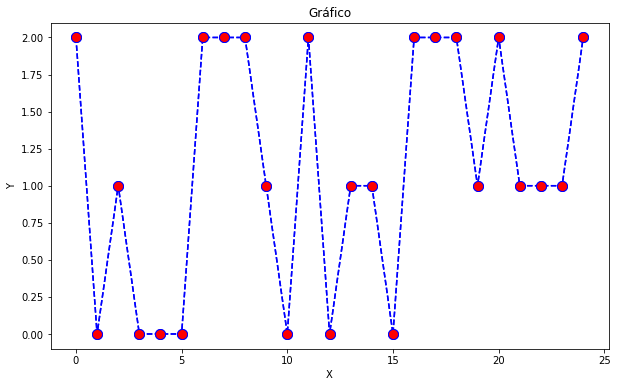

In [ ]:
# KNN 
plt.figure(figsize=(10,6))
plt.plot(range(0,25), score_knn, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Gráfico')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

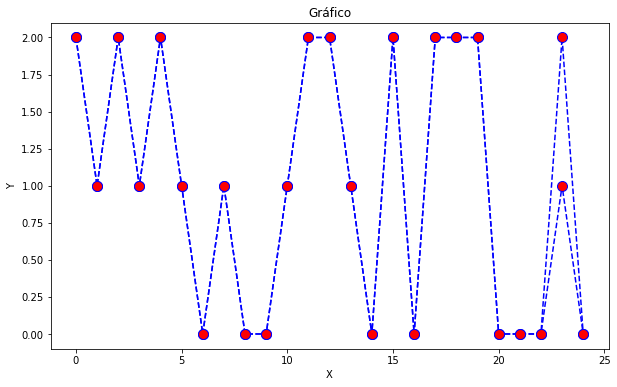

In [ ]:
# WKNN 
plt.figure(figsize=(10,6))
plt.plot(range(0,25), score_wknn, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Gráfico')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

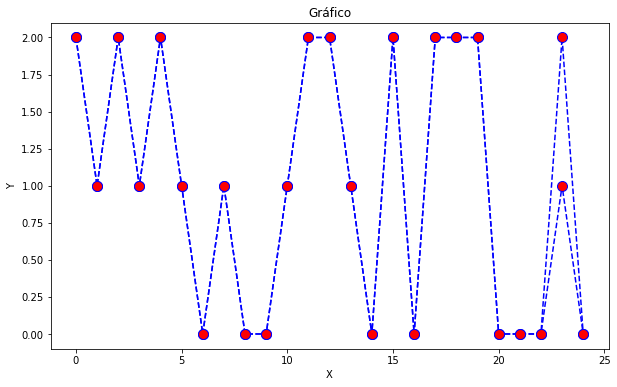

In [ ]:
# DWKNN 
plt.figure(figsize=(10,6))
plt.plot(range(0,25), score_dwknn, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Gráfico')
plt.xlabel('X')
plt.ylabel('Y')

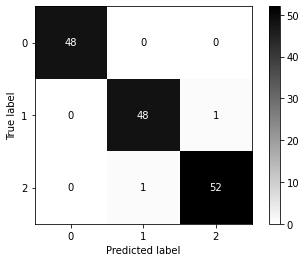

In [ ]:
#analisar a precisão de predição do modelo classe à classe do knn
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)

cm = confusion_matrix(lista_y_test, lista_X_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels= tnn_knn.target_values
)

disp.plot(cmap='binary')
plt.show()

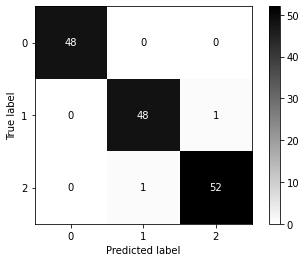

In [ ]:
#analisar a precisão de predição do modelo classe à classe do wknn
cm = confusion_matrix(lista_y_test,lista_X_test_wknn)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels= tnn.target_values
)

disp.plot(cmap='binary')
plt.show()

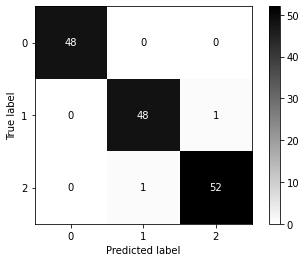

In [ ]:
#analisar a precisão de predição do modelo classe à classe do dwknn
cm = confusion_matrix(lista_y_test,lista_X_test_dwknn)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels= tnn.target_values
)

disp.plot(cmap='binary')
plt.show()